In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import re

In [28]:
df = pd.read_csv("draft_df_cleaned.csv", index_col=0)

In [29]:
df['ThreePPercent'] = pd.to_numeric(df['ThreePPercent'], errors='coerce')

In [30]:
df

,PLAYER,AFFILIATION,OVERALL PICK,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,...,BLK,PF,HEIGHT,WEIGHT,POSITION,ROTY,CENTER,FORWARD,GUARD,ROOKIE
0,Kwame Brown,Glynn Academy,1,2001,WAS,57.0,14.3,4.5,1.6,4.3,...,0.5,1.8,2.11,132.0,Center,0,1,0,0,0
1,Tyson Chandler,Dominguez,2,2001,CHI,71.0,19.6,6.1,2.1,4.3,...,1.3,2.5,2.13,107.0,Center,0,1,0,0,0
2,Pau Gasol,FC Barcelona Basquet (Spain),3,2001,MEM,82.0,36.6,17.6,6.7,13.0,...,2.1,2.4,2.13,113.0,Center-Forward,1,1,1,0,0
3,Jason Richardson,Michigan State,5,2001,GSW,80.0,32.8,14.4,5.8,13.6,...,0.4,2.4,1.98,102.0,Guard,0,0,0,1,0
4,Shane Battier,Duke,6,2001,MEM,78.0,39.7,14.4,5.3,12.3,...,1.0,2.8,2.03,100.0,Forward,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Kendall Brown,Baylor,48,2022,Minnesota Timberwolves,34.0,27.1,9.7,3.9,6.6,...,0.4,2.3,2.03,93.0,Guard,0,0,0,1,1
889,Isaiah Mobley,Southern California,49,2022,Cleveland Cavaliers,31.0,20.4,6.2,2.4,5.0,...,0.6,2.2,2.03,108.0,Forward,0,0,1,0,1
890,Tyrese Martin,Connecticut,51,2022,Golden State Warriors,33.0,27.0,8.1,3.0,7.2,...,0.3,2.1,1.98,98.0,Guard,0,0,0,1,1
891,JD Davison,Alabama,53,2022,Boston Celtics,33.0,25.8,8.5,3.0,6.5,...,0.4,1.2,1.91,88.0,Guard,0,0,0,1,1


In [31]:
df_train = df[df['ROOKIE'] == 0]

In [32]:
df_train

,PLAYER,AFFILIATION,OVERALL PICK,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,...,BLK,PF,HEIGHT,WEIGHT,POSITION,ROTY,CENTER,FORWARD,GUARD,ROOKIE
0,Kwame Brown,Glynn Academy,1,2001,WAS,57.0,14.3,4.5,1.6,4.3,...,0.5,1.8,2.11,132.0,Center,0,1,0,0,0
1,Tyson Chandler,Dominguez,2,2001,CHI,71.0,19.6,6.1,2.1,4.3,...,1.3,2.5,2.13,107.0,Center,0,1,0,0,0
2,Pau Gasol,FC Barcelona Basquet (Spain),3,2001,MEM,82.0,36.6,17.6,6.7,13.0,...,2.1,2.4,2.13,113.0,Center-Forward,1,1,1,0,0
3,Jason Richardson,Michigan State,5,2001,GSW,80.0,32.8,14.4,5.8,13.6,...,0.4,2.4,1.98,102.0,Guard,0,0,0,1,0
4,Shane Battier,Duke,6,2001,MEM,78.0,39.7,14.4,5.3,12.3,...,1.0,2.8,2.03,100.0,Forward,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Charles Bassey,Western Kentucky,53,2021,PHI,23.0,7.3,3.0,1.3,2.0,...,0.7,1.4,2.06,104.0,Center-Forward,0,1,1,0,0
848,Sandro Mamukelashvili,Seton Hall,54,2021,MIL,41.0,9.9,3.8,1.4,2.8,...,0.2,0.7,2.06,109.0,Forward-Center,0,1,1,0,0
849,Aaron Wiggins,Maryland,55,2021,OKC,50.0,24.2,8.3,3.1,6.7,...,0.2,1.9,1.93,86.0,Guard,0,0,0,1,0
850,Scottie Lewis,Florida,56,2021,CHA,2.0,3.3,0.5,0.0,0.0,...,0.0,0.0,1.96,84.0,Guard,0,0,0,1,0


In [33]:
df_train.describe()

,OVERALL PICK,YEAR,GP,MIN,PTS,FGM,FGA,FGPercent,ThreePM,ThreePA,...,STL,BLK,PF,HEIGHT,WEIGHT,ROTY,CENTER,FORWARD,GUARD,ROOKIE
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.00000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.0
mean,26.414319,2011.927230,46.703052,15.483920,5.774413,2.183451,5.030399,42.20223,0.425939,1.308568,...,0.491549,0.334624,1.524413,2.006350,100.334507,0.023474,0.237089,0.535211,0.462441,0.0
std,16.295622,6.109795,24.966626,8.725426,4.230203,1.586657,3.456720,10.90520,0.502353,1.395337,...,0.371422,0.359868,0.809181,0.086562,11.982344,0.151493,0.425547,0.499052,0.498880,0.0
min,1.000000,2001.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.750000,73.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12.000000,2007.000000,24.750000,8.500000,2.700000,1.000000,2.500000,38.00000,0.000000,0.100000,...,0.200000,0.100000,0.900000,1.930000,91.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,25.000000,2012.000000,49.500000,14.150000,4.600000,1.800000,4.200000,42.40000,0.250000,0.800000,...,0.400000,0.200000,1.500000,2.010000,100.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,40.000000,2018.000000,69.000000,21.500000,7.900000,3.000000,6.700000,47.10000,0.700000,2.100000,...,0.700000,0.500000,2.100000,2.080000,109.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,60.000000,2021.000000,82.000000,39.700000,22.500000,8.800000,18.900000,100.00000,2.500000,7.200000,...,2.200000,2.500000,4.100000,2.290000,141.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [34]:
df_quant = df_train.select_dtypes(include=np.number)
df_quant.columns

Index(['OVERALL PICK', 'YEAR', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FGPercent',
       'ThreePM', 'ThreePA', 'ThreePPercent', 'FTM', 'FTA', 'FTPercent',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'HEIGHT',
       'WEIGHT', 'ROTY', 'CENTER', 'FORWARD', 'GUARD', 'ROOKIE'],
      dtype='object')

C:\Users\asimp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


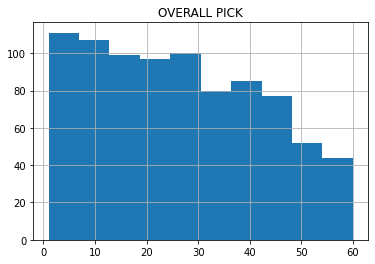

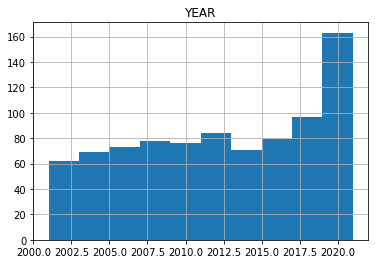

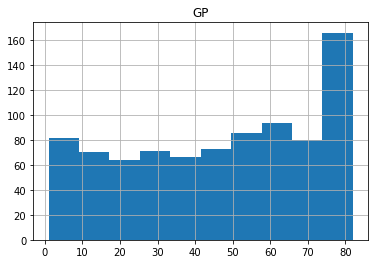

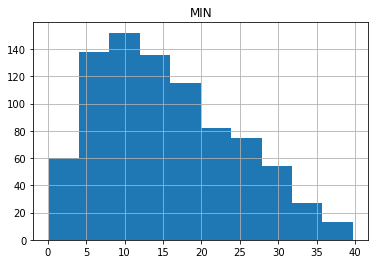

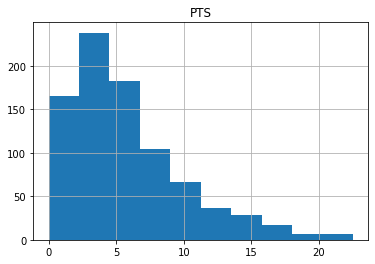

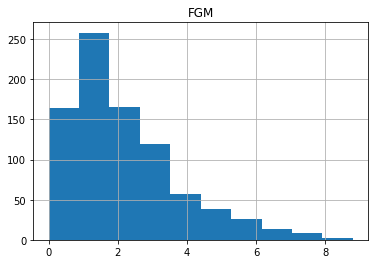

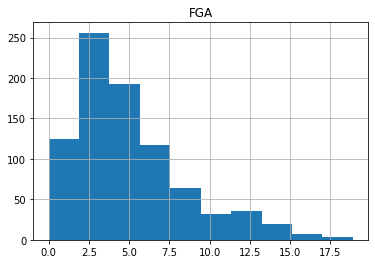

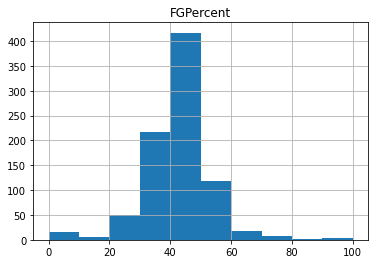

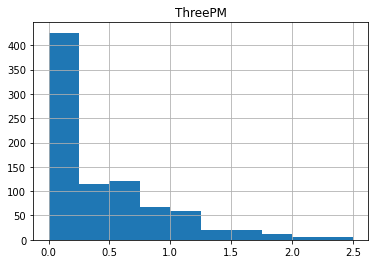

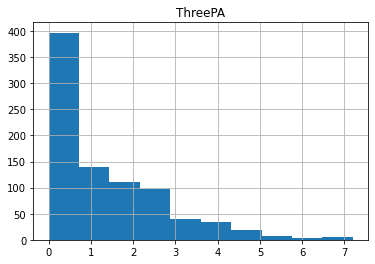

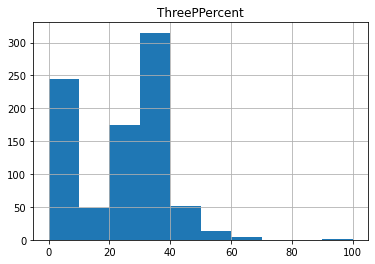

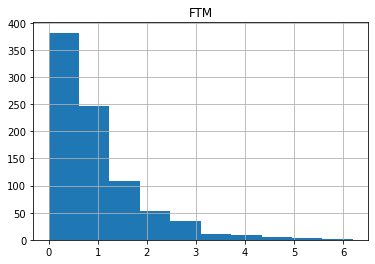

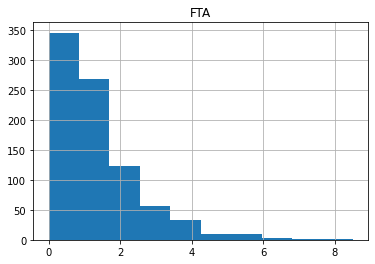

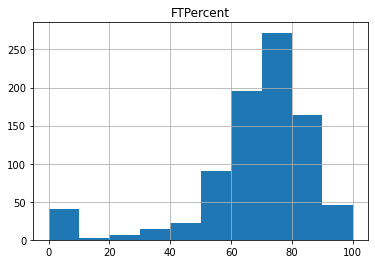

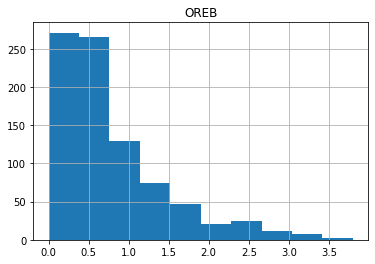

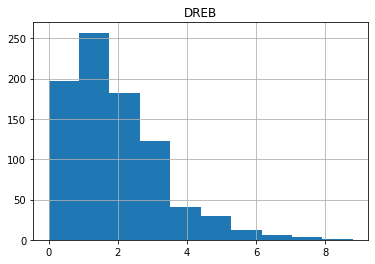

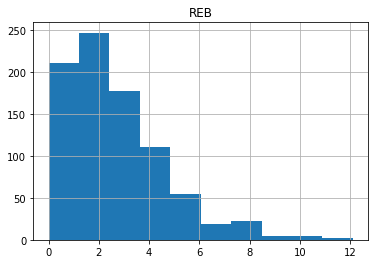

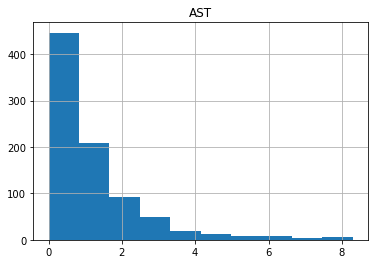

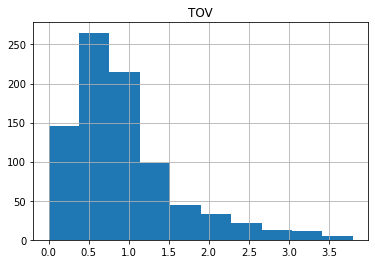

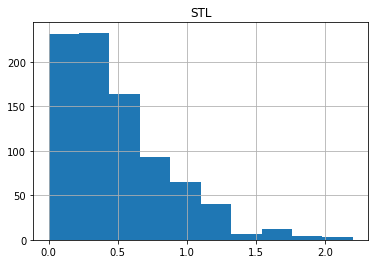

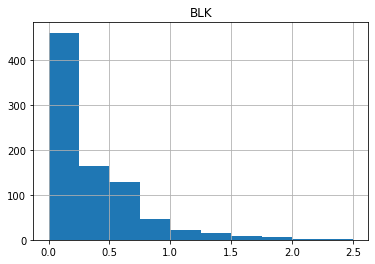

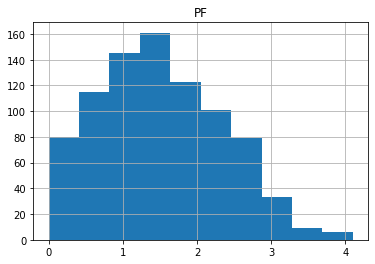

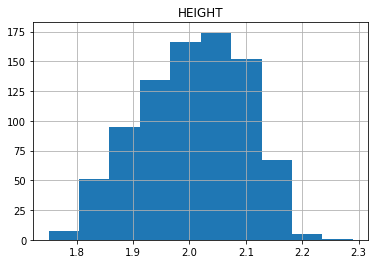

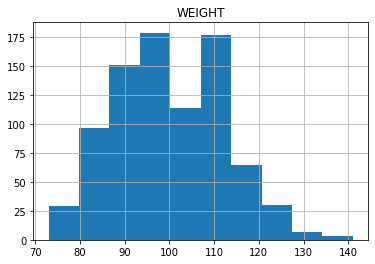

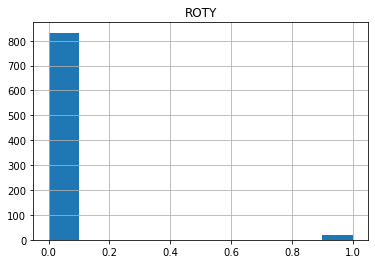

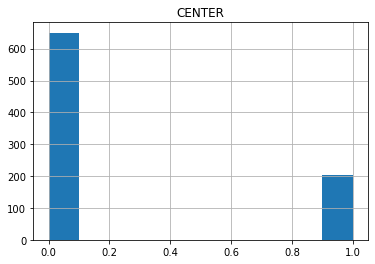

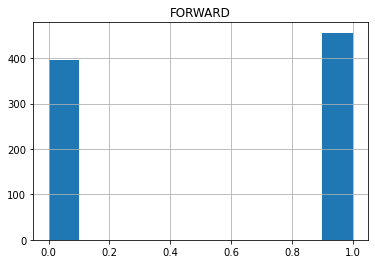

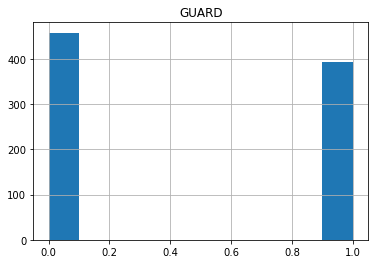

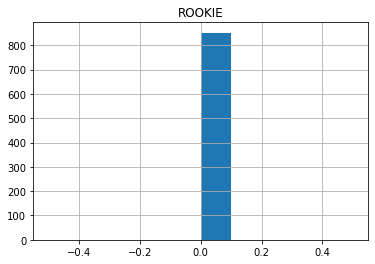

In [35]:
for i in df_quant.columns:
    fig = df_quant.hist(i)
    fig


C:\Users\asimp\AppData\Local\Temp/ipykernel_13980/1008370968.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


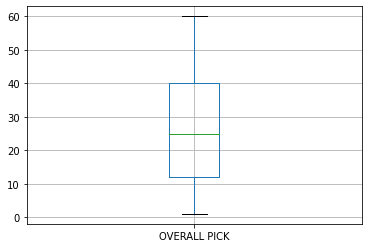

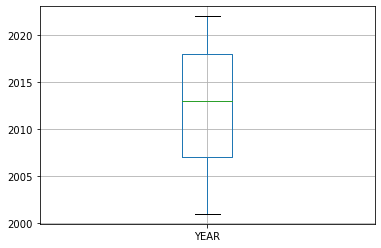

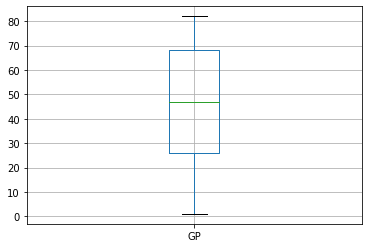

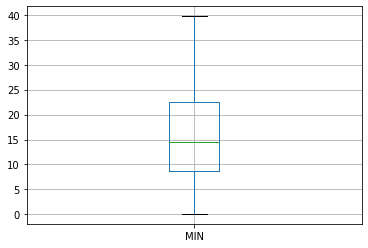

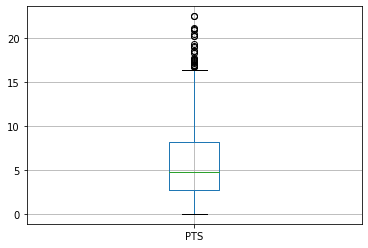

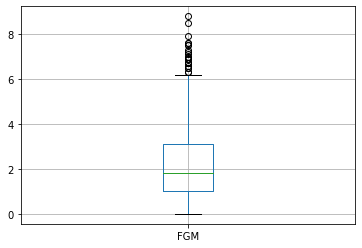

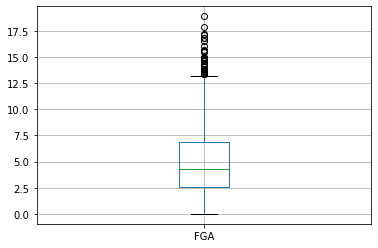

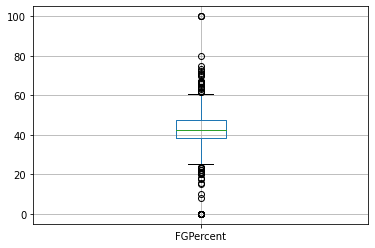

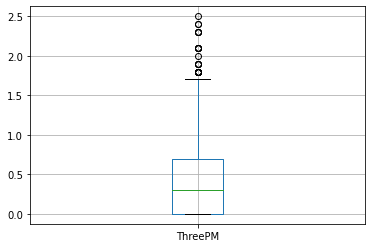

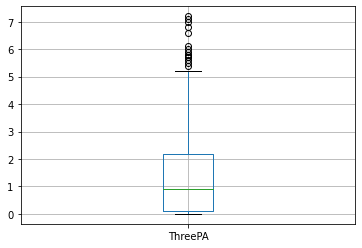

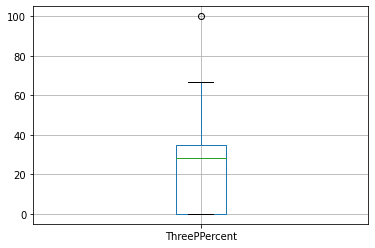

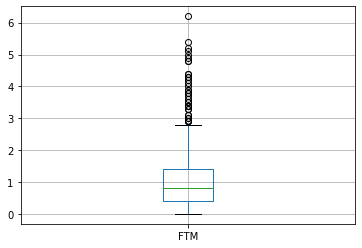

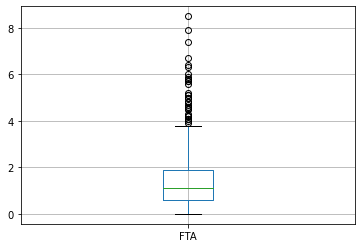

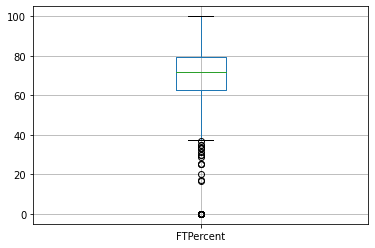

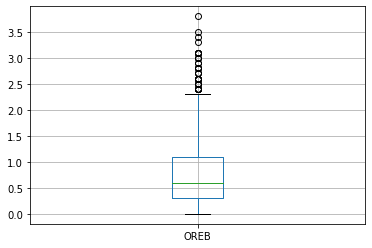

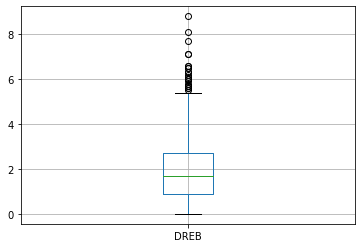

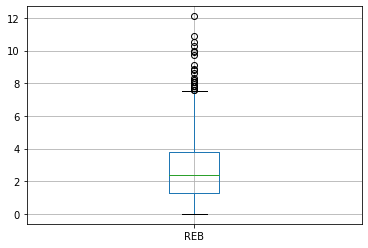

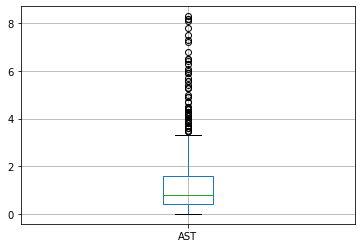

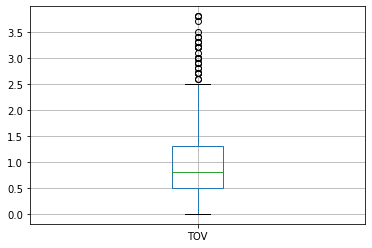

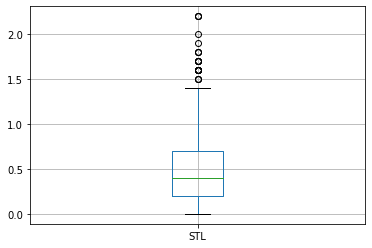

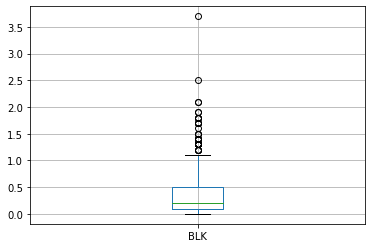

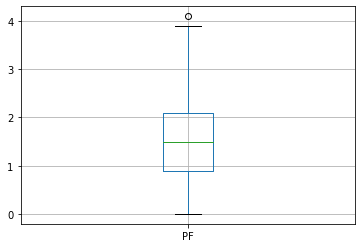

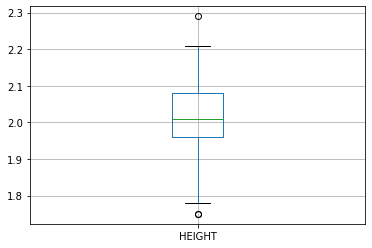

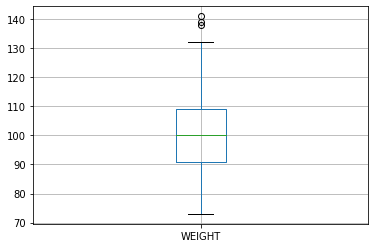

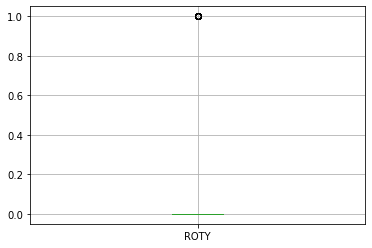

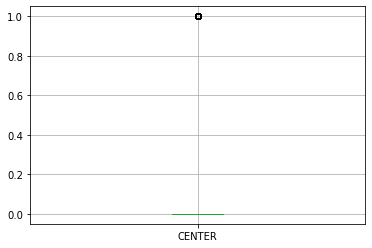

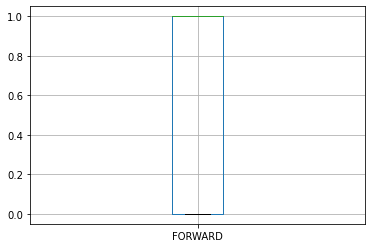

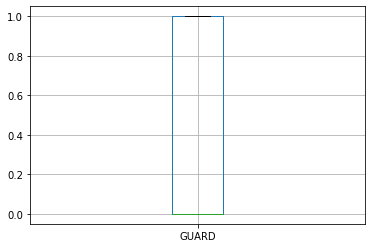

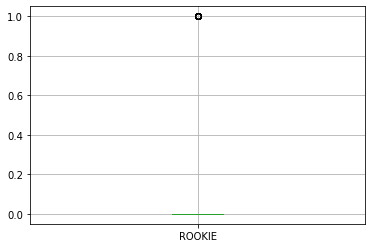

In [36]:
for column in df_quant:
    plt.figure()
    df.boxplot([column])

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

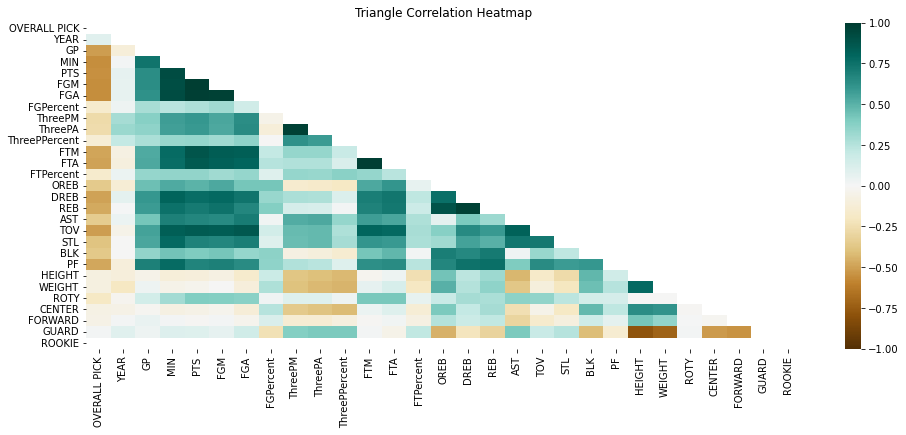

In [37]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
corr = df_quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap')

Text(0.5, 1.0, 'Features Correlating with ROTY')

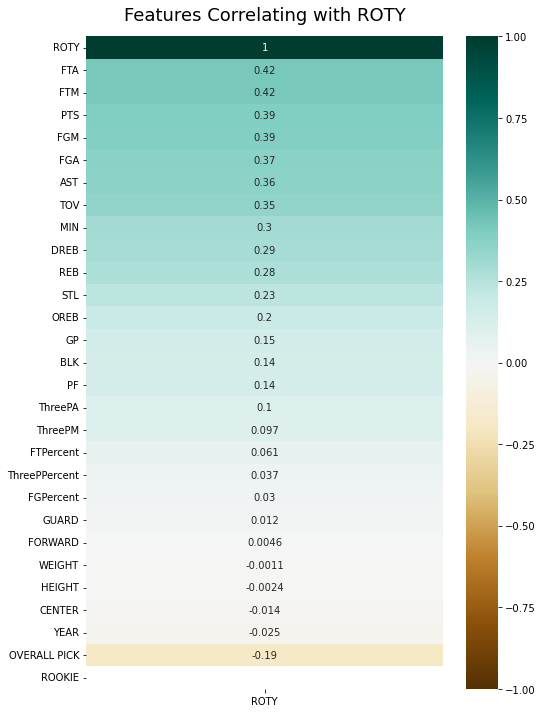

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_train.corr()[['ROTY']].sort_values(by='ROTY', ascending=False), vmin=-1, vmax=1, 
                      annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with ROTY', fontdict={'fontsize':18}, pad=16)

In [50]:
df_train = df_train.rename(columns=lambda x: re.sub(' ','',x)) #dmatrices gets syntax error with space present in name

mcorr = "ROTY ~ FTA + AST + DREB + STL + OREB + GP + BLK + PF + ThreePM + FTPercent + ThreePPercent + FGPercent \
+ GUARD + FORWARD + WEIGHT + HEIGHT + CENTER + YEAR + OVERALLPICK"

y, X = dmatrices(mcorr, data=df_train, return_type='dataframe')


vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

              VIF       variable
0   156607.597566      Intercept
1        2.990920            FTA
2        3.380115            AST
3        5.720938           DREB
4        3.054409            STL
5        4.947962           OREB
6        2.543109             GP
7        2.789979            BLK
8        3.781867             PF
9        2.683149        ThreePM
10       1.317596      FTPercent
11       1.947836  ThreePPercent
12       1.336005      FGPercent
13       3.536351          GUARD
14       1.994608        FORWARD
15       3.446427         WEIGHT
16       4.429301         HEIGHT
17       2.572334         CENTER
18       1.392415           YEAR
19       1.611339    OVERALLPICK


In [53]:
pd.pivot_table(df_train, index="TEAM", values="ROTY", aggfunc='sum').sort_values("ROTY", ascending=False)

,ROTY
TEAM,
CHA,2
CLE,2
POR,2
MEM,2
MIN,1
CHI,1
DAL,1
TOR,1
SEA,1


In [54]:
pd.pivot_table(df, index="AFFILIATION", values="ROTY", aggfunc='sum').sort_values("ROTY", ascending=False).head(20)

,ROTY
AFFILIATION,
Murray State,1
Washington,1
Kansas,1
Connecticut,1
Cypress Creek,1
Oklahoma,1
Real Madrid Baloncesto (Spain),1
Duke,1
FC Barcelona Basquet (Spain),1


In [55]:
pd.pivot_table(df_train, index="POSITION", values="ROTY", aggfunc="sum").sort_values("ROTY", ascending=False)

,ROTY
POSITION,
Guard,6
Forward,5
Center,1
Center-Forward,1
Forward-Center,1
Forward-Guard,1
Guard-Forward,0


In [56]:
df_train[["ROTY", "ThreePA", "FTM", "OREB", "BLK", "GP", "AST", "STL", "FGPercent", "ThreePPercent", \
         "FTPercent", "PF", "HEIGHT", "WEIGHT", "CENTER", "FORWARD", "GUARD", "OVERALLPICK", "YEAR"]] #cols with low VIF

,ROTY,ThreePA,FTM,OREB,BLK,GP,AST,STL,FGPercent,ThreePPercent,FTPercent,PF,HEIGHT,WEIGHT,CENTER,FORWARD,GUARD,OVERALLPICK,YEAR
0,0,0.0,1.2,1.1,0.5,57.0,0.8,0.3,38.7,0.0,70.7,1.8,2.11,132.0,1,0,0,1,2001
1,1,0.1,4.1,2.9,2.1,82.0,2.7,0.5,51.8,20.0,70.9,2.4,2.13,113.0,1,1,0,3,2001
2,0,3.1,1.8,1.6,0.4,80.0,3.0,1.3,42.6,33.3,67.1,2.4,1.98,102.0,0,0,1,5,2001
3,0,0.6,0.8,0.1,0.1,16.0,0.8,0.6,35.0,22.2,85.7,0.4,2.06,104.0,0,1,0,9,2001
4,0,0.4,0.5,0.1,0.0,8.0,0.8,0.3,8.3,0.0,100.0,0.1,1.93,88.0,0,0,1,21,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0.0,0.7,0.9,0.5,15.0,0.4,0.1,44.7,0.0,64.7,1.2,2.13,112.0,1,0,0,39,2021
363,0,3.4,0.6,0.8,0.4,19.0,1.1,0.7,45.6,42.2,85.7,1.9,1.98,105.0,0,1,0,42,2021
364,0,1.3,0.9,0.8,0.5,48.0,0.7,0.5,42.6,31.1,67.7,1.9,2.01,93.0,0,1,0,43,2021
365,0,2.8,0.3,0.9,0.5,48.0,0.6,0.6,41.2,35.3,84.2,1.8,2.01,92.0,0,1,0,44,2021
